# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
* The columns 'cost_of_the_day', 'rating', 'food_preparation' and 'delivery_time' should be numerical data.
* The columns 'order_id' and 'customer_id' could be any data type.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Dimension of the dataset
print(df.shape)

(1898, 9)


#### Observations:

The dataframe has 1898 rows and 9 columns as specified in the data dictionary.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

We have different data types in the dataset:
* There are 5 numerical columns and 4 object type columns.
* The column 'rating' is being read as an object type variable but it should be read as a numerical one.
* The columns 'order_id' and 'customer_id' are being read as numerical variables.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Let's have the values count for each column
data_interest = ['restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time']

for columns in data_interest:
    print(df[columns].value_counts(dropna = False))
    print("-"*50)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
--------------------------------------------------
cost_of_the_order
12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61   

In [6]:
# Treatment for the missing values - Replacing them by NAN
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = df['rating'].astype(float)
df['rating'].unique()

array([nan,  5.,  3.,  4.])

In [7]:
# The new information after the operation on the rating column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:

* At first look, there is no missing data. The info() function shows all the columns have the same number of information (1898).
* But, the column 'rating' caught our attention as it has been read as an object type data. After examining the values of this column, we noted that there were 736 (39%) missing ratings (Not given). It is the only column with missing data.
* The missing values 'Not given' have been treated, replacing them by NA (using the function 'np.nan').
* Finally, we converted the 'rating' column from object type to int type data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Statistical summary of the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

* 'restaurant_name': The most popular restaurant is Shake Shack with 219 orders.
* 'cuisine_type': The most popular cuisine is american cuisine with 684 orders. 
* 'day_of_the_week': The period the most orders have been placed is on the weekends.
* 'cost_of_the_order': The minimum cost for an order is 4.47 dollars and the maximum is 35.41 dollars. 25% of the orders cost less than 12.08; 50% less than 14.14 and 75% less than 22.30. On average, an order costs 16.5 dollars.
* 'food_preparation_time': The minimum time for food to be prepared is 20 minutes, 35 minutes at most. 25% of the orders are ready in less than 23 minutes; 50% in less than 27 minutes. And on average, 27.4 minutes is enough for the food to be prepared.
* 'delivery_time': The delivery time varies between 15 and 33 minutes. The mean time for delivery is 24.16 minutes.
* 'rating': The rating is on a scale out of 5. The minimum value is 3 and the maximum is 5. 50% of the orders placed have a rating of 5/5. On average, the rating is 4.34.

  
Once an order is placed, the minimum time it takes for food to be prepared is 20 minutes, the maximum time is 35 minutes. In average, they take about 27 minutes to prepare the food once ordered.

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# Number of orders not rated
print(df[df['rating'].isna()].shape[0])

736


#### Observations:
736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [10]:
# Number of unique values by variable
data_interest = ['restaurant_name', 'cuisine_type',
       'day_of_the_week', 'rating']

for columns in data_interest:
    print(f"Number of unique '{columns}': {df[columns].nunique()}")
    print("-"*50)

Number of unique 'restaurant_name': 178
--------------------------------------------------
Number of unique 'cuisine_type': 14
--------------------------------------------------
Number of unique 'day_of_the_week': 2
--------------------------------------------------
Number of unique 'rating': 3
--------------------------------------------------


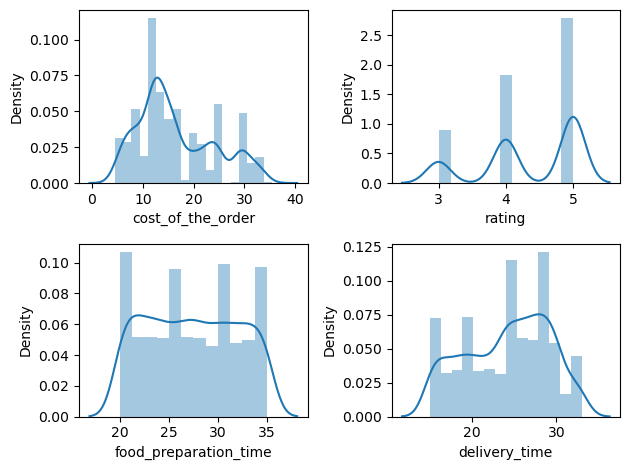

In [11]:
# Univariate analysis - Histograms
num_data = df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']]
for i,elt in enumerate(num_data):
    plt.subplot(2, 2, i+1)
    sns.distplot(num_data[elt])
    plt.tight_layout()
plt.show();

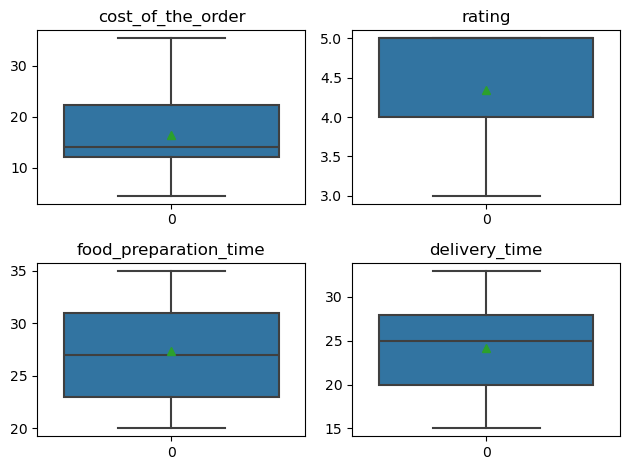

In [12]:
# Univariate analysis - Boxplots
for i,elt in enumerate(num_data):
    plt.subplot(2, 2, i+1)
    sns.boxplot(num_data[elt], showmeans = True)
    plt.tight_layout()
    plt.title(elt)
plt.show();

In [13]:
# Creating a function to plot the categorical variables
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (10, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.2                     # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage
        plt.xticks(rotation = 90)
    plt.show()                                                      # Display the plot

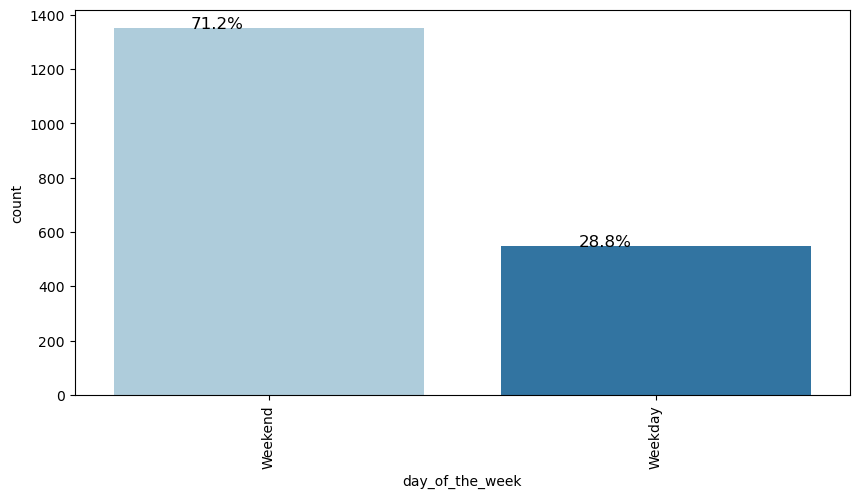

In [14]:
# Distribution in percentage of the orders by day of the week
bar_perc(df, 'day_of_the_week')

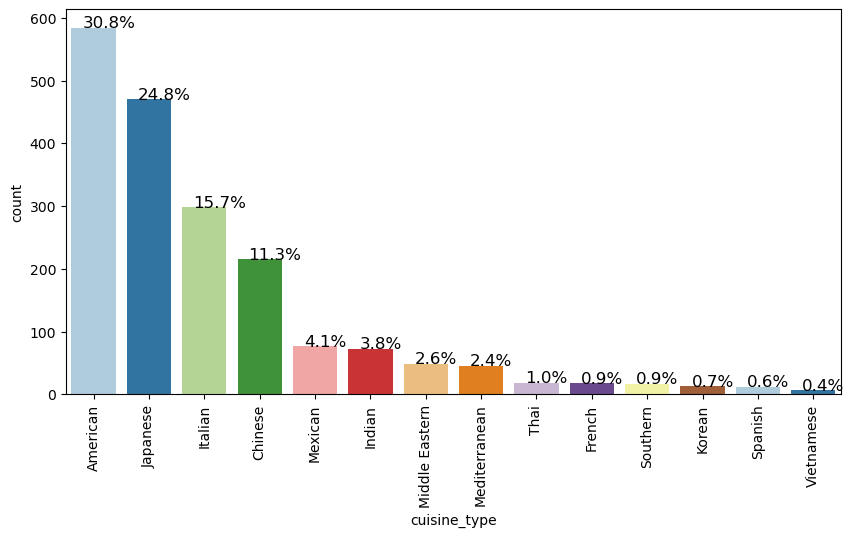

In [15]:
# Univariate analysis - Distribution in percentage of orders by cuisine type
bar_perc(df, 'cuisine_type')

In [16]:
# Number of orders by restaurant
nb_orders = df.pivot_table(index = 'restaurant_name', values = 'order_id', aggfunc = len)
nb_orders.reset_index(inplace = True)
nb_orders = nb_orders.sort_values('order_id', ascending = False).reset_index(drop = True)
nb_orders.rename(columns = {'order_id': 'number_orders_received'}, inplace = True)
nb_orders

,restaurant_name,number_orders_received
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
...,...,...
173,Klong,1
174,Kambi Ramen House,1
175,Il Bambino,1
176,Hunan Manor,1


#### Observations:

For the numerical variables, we use histograms and boxplots for the univariate analysis. For the categorical columns, we use count plots.
* 'cost_of_the_order': the histogram is a bit right-skewed. The mean is slightly greater than the median. Most of the cost (the mode) is around 12 dollars.
* 'rating': this variable has only 3 values making the histogram sparse, and left-skewed. The mean is less than the median which is confused with Q3 and the maximum (5). The mode is also 5, indicating that the service from the restaurant is quite good or excellent.
* 'food_preparation_time': the data seems uniformely distributed, with some peaks. We can see that the mean (27.37) is almost equal to the median (27). The mode is about 20 minutes. 
* 'delivery_time': The histogram is a bit left-skewed: the mean is less than the median.
* 'day_of_the_week': 71.2% of the orders have been placed on the weekends.
* 'cuisine_type': American cuisine (30.8%) is the mode for this variable, followed by Japanese (24.8%) and Italian cuisines (15.7%).
* 'restaurant_name': Shake Shack is the restaurant with the most orders placed among the 178 restaurants in the dataset.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
# Top 5 restaurants in terms of the number of orders received
top_restaurant = nb_orders.head(5)
top_restaurant

,restaurant_name,number_orders_received
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
In terms of orders received, the top 5 restaurants are:
* Shake Shack with 219 orders received;
* The Meatball Shop with 132 orders received;
* Blue Ribbon Sushi with 119 orders received;
* Blue Ribbon Fried Chicken with 96 orders received;
* and finally, Parm with 68 orders received.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [18]:
# Finding the most popular cuisine on weekends
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:
The most popular cuisine on weekends is **American cuisine** (with 415 orders).

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
# Percentage of the orders costing more than 20 dollars
orders_more_20 = df[df['cost_of_the_order'] > 20]
percentage_orders_more_20 = (orders_more_20.shape[0]/df.shape[0])
percentage_orders_more_20

0.2924130663856691

#### Observations:
**29.24%** of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [20]:
# Mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
mean_delivery_time

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes. The same information can be found with the info() function.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
# Finding the top 3 most frequent customers - Analyzing the number of orders placed by the customers
orders_by_cust = df.pivot_table(index = 'customer_id', values = 'order_id', aggfunc = len)
orders_by_cust.rename(columns = {'order_id': 'number_orders'}, inplace = True)
orders_by_cust = orders_by_cust.sort_values('number_orders', ascending = False)
orders_by_cust.reset_index(inplace = True)
top_cust = orders_by_cust.head(3)
top_cust

,customer_id,number_orders
0,52832,13
1,47440,10
2,83287,9


#### Observations:
Here are the top 3 most frequent customers:
* Customer '52832' with 13 orders placed;
* Customer '47440' with 10 orders placed;
* and Customer '83287' with 9 orders placed.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Figure size 500x500 with 0 Axes>

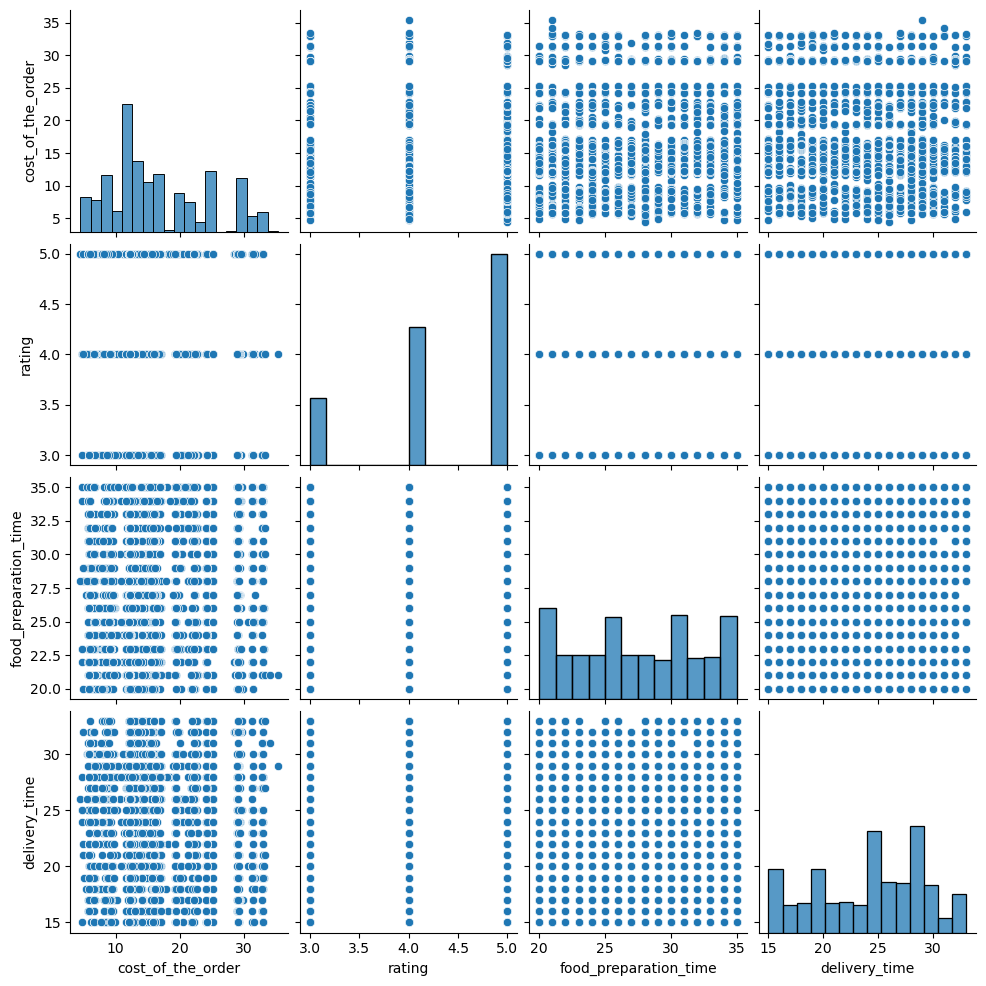

In [22]:
# Let's generate a pairplot to identify a few a priori relationships between the numerical variables
plt.figure(figsize = (5, 5))
sns.pairplot(num_data);
plt.show();

In [23]:
# Let's use a correlation matrix to quantify the level of relationship between the numerical variables
plt.figure(figsize = (10, 5))
num_data.corr()

,cost_of_the_order,rating,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.033983,0.041527,-0.029949
rating,0.033983,1.000000,-0.006083,-0.009804
food_preparation_time,0.041527,-0.006083,1.000000,0.011094
delivery_time,-0.029949,-0.009804,0.011094,1.000000


<Figure size 1000x500 with 0 Axes>

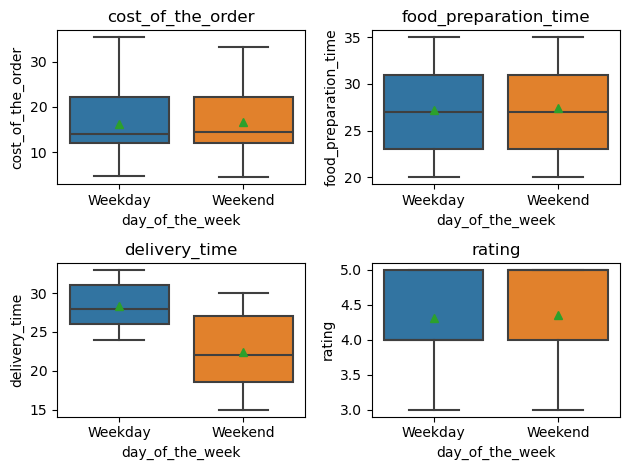

In [24]:
# Analysis of the cost of the orders, the food preparation time, the delivery time and rating by the day of the week.
data_week = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']

for i,elt in enumerate(data_week):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = df['day_of_the_week'], y = df[elt], showmeans = True)
    plt.tight_layout()
    plt.title(elt)
plt.show();

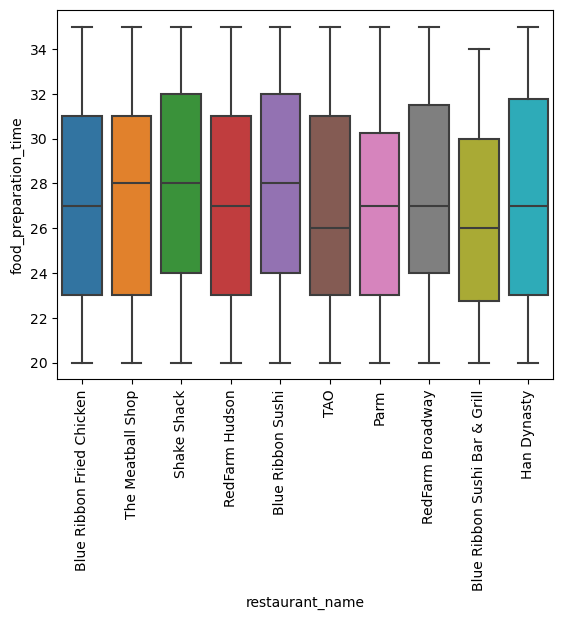

In [25]:
# Analysis of the time for food preparation for the Top 10 restaurants
top10_restaurant = nb_orders.head(10)
data_top10 = df[df['restaurant_name'].isin(top10_restaurant['restaurant_name'])]
sns.boxplot(data_top10, x = 'restaurant_name', y = 'food_preparation_time')
plt.xticks(rotation = 90);

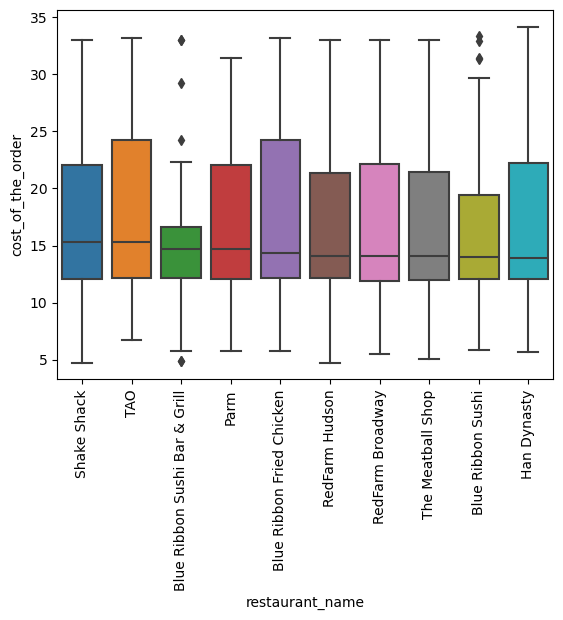

In [26]:
# Analysis of the cost of the orders for the top 10 restaurants
price_median = data_top10.groupby('restaurant_name')['cost_of_the_order'].median()
sorted_categories = price_median.sort_values(ascending = False).index
sorted_df = df.set_index('restaurant_name').loc[sorted_categories].reset_index()
sns.boxplot(sorted_df, x = 'restaurant_name', y = 'cost_of_the_order', order = sorted_categories)
plt.xticks(rotation = 90);


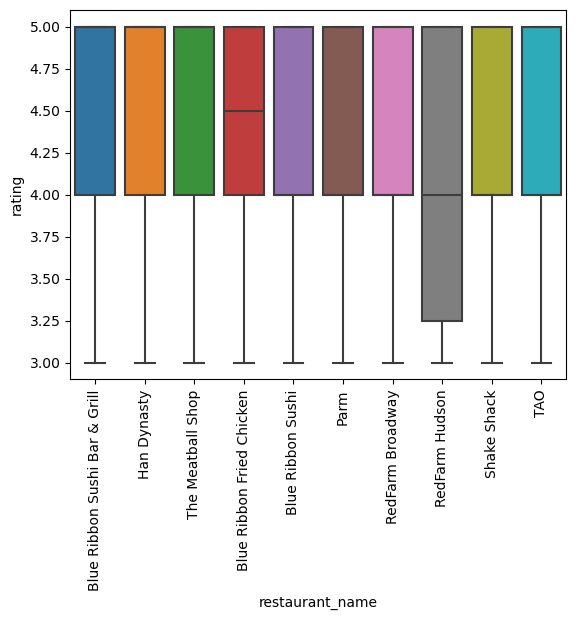

In [27]:
# Analysis of the rating of the orders for the top 10 restaurants
price_median = data_top10.groupby('restaurant_name')['rating'].median()
sorted_categories = price_median.sort_values(ascending = False).index
sorted_df = df.set_index('restaurant_name').loc[sorted_categories].reset_index()
sns.boxplot(sorted_df, x = 'restaurant_name', y = 'rating', order = sorted_categories)
plt.xticks(rotation = 90);

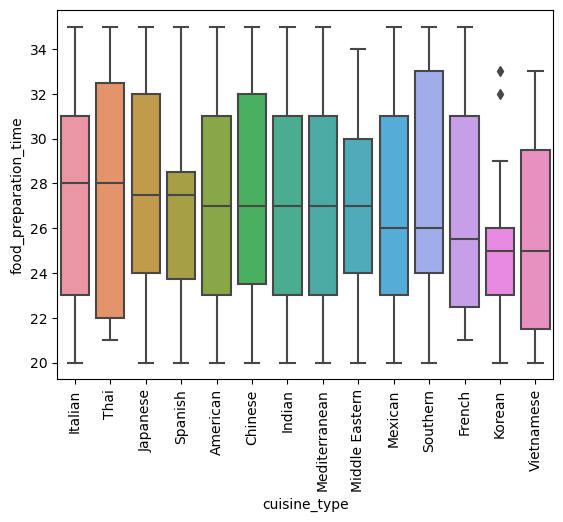

In [28]:
# Preparation time by cuisine type
cuisine_median = df.groupby('cuisine_type')['food_preparation_time'].median()
sorted_categories = cuisine_median.sort_values(ascending = False).index
sorted_df = df.set_index('cuisine_type').loc[sorted_categories].reset_index()
sns.boxplot(sorted_df, x = 'cuisine_type', y = 'food_preparation_time', order = sorted_categories)
plt.xticks(rotation = 90);

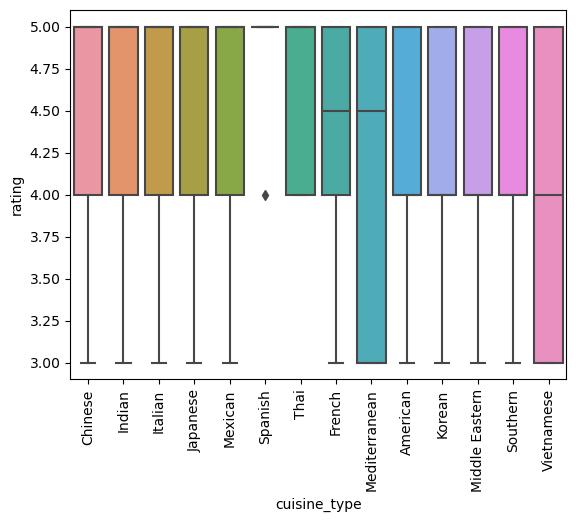

In [29]:
# Rating by cuisine type
cuisine_rating_median = df.groupby('cuisine_type')['rating'].median()
sorted_categories = cuisine_rating_median.sort_values(ascending = False).index
sorted_df = df.set_index('cuisine_type').loc[sorted_categories].reset_index()
sns.boxplot(sorted_df, x = 'cuisine_type', y = 'rating', order = sorted_categories)
plt.xticks(rotation = 90);

#### Observations:
* (Very weak) Negative relationship between the rating and the preparation time and also the delivery time of the food. That means that as the time to prepare or to deliver the food increases, the rating (slightly) decreases.
* 50% of the orders have a delivery time higher or equal to 28 minutes on weekdays. This time is 22 minutes on weekends, i.e 6 minutes less. 
* The median cost of an order among the top 10 restaurants (with the most orders) is around 15 dollars. The restaurants 'Blue Ribbon Sushi Bar&Grill' and 'Blue Ribbon Sushi' have some outliers for the cost of the food.
* Except the 'Redfarm hudson' restaurant, all the restaurants have 75% of their orders rated at least 4 out of 5.
* The Italian and Thai cuisine have the highest median time for food preparation (28), implying these foods are maybe more complicated to prepare. Korean and Vietnamese have the lowest median time for food preparation.
* The cuisine types with the highest rating are Spanish, Chinese, Indian, Italian, Japanese and Mexican. They all got a median rating of 5 out of 5. The Vietnamese cuisine is one of the cuisine having received the lowest ratings (50% ratings less or equal to 4).

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [30]:
# Let's find the restaurants with a rating count of more 50
rating_count = df.groupby('restaurant_name')[['rating']].count()
rating_count.reset_index(inplace = True)
rating_count = rating_count.sort_values('rating', ascending = False).reset_index(drop = True)
rating_count.rename(columns = {'rating': 'rating_count'}, inplace = True)
rating_more_50 = rating_count[rating_count['rating_count'] > 50]

#=============================================================================================

# Let's find the average rating of the restaurants with more than 50 rating count
rating_average = df[df['restaurant_name'].isin(rating_more_50['restaurant_name'])].groupby('restaurant_name')[['rating']].mean()
rating_average.rename(columns = {'rating': 'rating_average'}, inplace = True)

#=============================================================================================

# Merging the number of ratings and the average number of rating by restauranr
eligible_restaurant = rating_more_50.merge(rating_average, on = 'restaurant_name', how = 'left')
eligible_restaurant

,restaurant_name,rating_count,rating_average
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:

We found 4 restaurants that fulfill the criteria for the promotional offer:
* Shake Shack with a total of 133 rating count and an average rating of 4.28;
* The Meatball Shop with 84 ratings and an average rating of 4.51;
* Blue Ribbon Sushi with 73 ratings and an average rating of 4.22;
* And Blue Ribbon Fried Chicken with a total of 64 ratings and an average rating of 4.33.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [31]:
# Write the code here
def revenue(data):
    if data > 20:
        return data*0.25
    elif data > 5:
        return data*0.15
    else:
        return 0


df['revenue'] = df['cost_of_the_order'].apply(revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385


In [32]:
net_revenue = df['revenue'].sum(axis = 0)
net_revenue

6166.303

#### Observations:

* We compute a new column using the given information: 25% of charges for orders having cost greater than 20 dollars, 15% for orders with cost greater than 5 dollars. We call the new column 'revenue'.
* The company's net revenue generated across all orders is **6166.303 dollars**.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [33]:
# Creating a new column for the total time to deliver the food once the order placed
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

def time_range(data):
    if data > 60:
        return 'More_than_60'
    else:
        return 'Less_than_60'

df['total_time_range'] = df['total_time'].apply(time_range)

print(df['total_time_range'].value_counts(normalize = True))

total_time_range
Less_than_60    0.894626
More_than_60    0.105374
Name: proportion, dtype: float64


In [34]:
# Average time from order to delivery
round(df['total_time'].mean(), 2)

51.53

In [35]:
# In the next 3 cells, we are trying to estimate the probability that 
# an order will be delivered in less than 60 minutes
from scipy.stats import norm

# Calculate the mean of the sample
mean_total_time = df['total_time'].mean()

# Calculate the standard deviation of the sample
std_total_time = df['total_time'].std()

print("The sample mean is", round(mean_total_time, 2))
print("The sample standard deviation is", round(std_total_time, 2))

The sample mean is 51.53
The sample standard deviation is 6.83


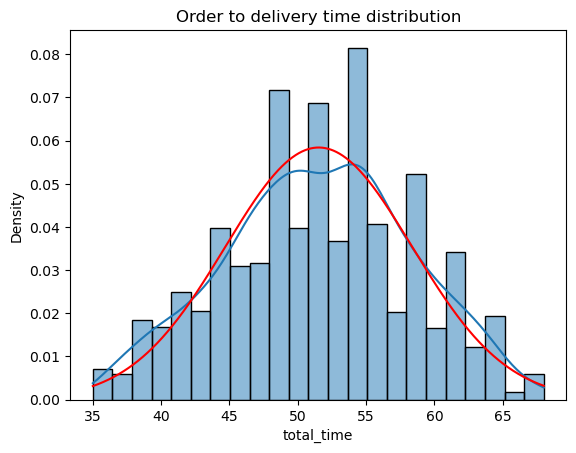

In [36]:
# calculate the pdf of total time for the orders using norm.pdf()
density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(
    df['total_time'].min(), df['total_time'].max(), 1898
) # create an array of 1898 numbers in between the min and max time range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], mean_total_time, std_total_time) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(df['total_time'], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Order to delivery time distribution") # set the title
plt.show() # display the plot

In [37]:
# Let's calculate the probability that an order will take less than 60 minutes to prepare and deliver to the customer
prob_time_order_60 = norm.cdf(60, mean_total_time, std_total_time)
print(f"{round(prob_time_order_60, 3)}")

0.892


#### Observations:

* The percentage of orders taking more than 60 minutes is 10.5%. The average time from placing an order to delivery is 51.53 minutes.
* We can see that the data for the total time for an order to be prepared and delivered follows approximately a normal distribution. We use that information to inference on the population of orders. We found that the probability for an order to take less than 60 minutes to reach the customer is 89.2%.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [38]:
# Delivery time by day of the week
delivery_time_day = df.groupby('day_of_the_week')[['delivery_time']].mean()
delivery_time_day

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:

* The average delivery time on weekdays is 28.34 minutes.
* The average delivery time on weekends is 22.47 minutes.

It appears that delivery takes less time on weekends than weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
We analyzed a dataset of 1,898 different orders placed by registered customers on the online portal of a food aggregation company, FoodHub. The aim was to obtain an accurate picture of demand from different restaurants, which would help improve the customer experience. In this dataset, customer experience is recorded by the variable “rating” on a scale of 5. The analysis of this data can provide actionable insights that can significantly improve customer satisfaction. This enables informed decision-making and strategic planning, leading to growth and success.

From this analysis, we have been able to conclude that:

 1. The top 5 restaurants affiliated with FoodHub are Shake shack, The Meatball shop, Blue ribbon sushi, Blue ribbon fried sushi and Parm;
 2. 71% of orders have been placed on weekends and deliveries take 6 minutes less than on weekdays;
 3. The most cuisine ordered is American cuisine, followed by Japanese and Italian;
 4. Counter-intuitively, American cuisine is not the best-rated cuisine. It occupies 10th place with Korean, Southern, Middle-Eastern and Vietnamese cuisines;
 5. In general, 10.5% of orders take more than 60 minutes from order to delivery. In average, the food takes 51.53 minutes to reach the customer once it has been ordered;
 6. The probability for an order to reach the customer in less than 60 minutes once placed is 89.2%;
 7. There is a very weak, almost non-existent, negative relationship between the rating and the time for food preparation and also the delivery time.


### Recommendations:

1. As there are more orders placed on weekends, the company must ensure that there is enough people to deliver the food in the shortest possible time;
2. Cuisines like Spanish, Chinese, Indian, Italian, Japanese and Mexican have to be promoted more as they have higher ratings. For the Vietnamese type, we should maybe review the menu/recipes or the preparation method to meet the customer expectations and improve his/her satisfaction;
3.  Noting that food preparation time negatively affects the rating, we can streamline kitchen operations to reduce preparation time without compromising quality. Train staff in efficient cooking techniques and consider preparing ingredients in advance;
4.  For the delivery time, we can improve delivery operations to provide quicker service. This might involve optimizing route planning, increasing the number of delivery personnel, or partnering with delivery services. Make sure the packaging maintains the food's warmth and quality during transport.
5.  Finally, continuously gather and analyze customer feedback to identify areas of improvement and track the effectiveness of implemented changes.

---